Epoch [10/100], Loss: 492.6212463378906
Epoch [20/100], Loss: 482.19927978515625
Epoch [30/100], Loss: 482.0834045410156
Epoch [40/100], Loss: 481.97027587890625
Epoch [50/100], Loss: 481.857666015625
Epoch [60/100], Loss: 481.74566650390625
Epoch [70/100], Loss: 481.63458251953125
Epoch [80/100], Loss: 481.5243225097656
Epoch [90/100], Loss: 481.4148864746094
Epoch [100/100], Loss: 481.30609130859375


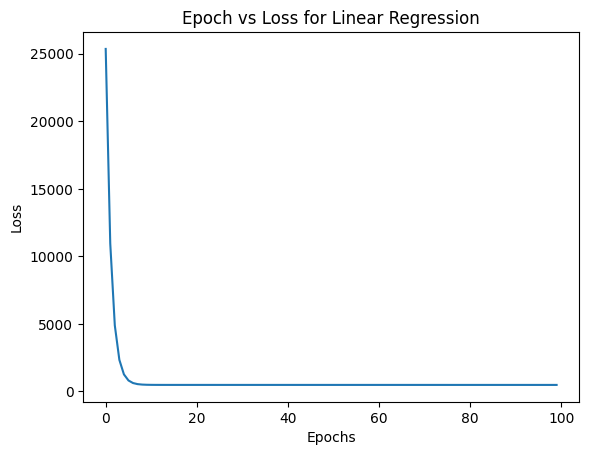

Final w: 12.85075855255127
Final b: 2.150007724761963


In [1]:
import torch
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self):
       
        self.w = torch.tensor(1.0, requires_grad=True)
        self.b = torch.tensor(1.0, requires_grad=True)
        
    def forward(self, x):
        
        return self.w * x + self.b
    
    def update(self, learning_rate):
        
        with torch.no_grad():
            self.w -= learning_rate * self.w.grad
            self.b -= learning_rate * self.b.grad
            
    def reset_grad(self):
        
        self.w.grad.zero_()
        self.b.grad.zero_()
    
    def criterion(self, y, yp):
      
        return torch.mean((yp - y) ** 2)


x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])


learning_rate = torch.tensor(0.001)


model = RegressionModel()


epochs = 100


losses = []


for epoch in range(epochs):
   
    y_pred = model.forward(x)
    
    
    loss = model.criterion(y, y_pred)
    
    
    loss.backward()
    
    
    model.update(learning_rate)
    
    
    model.reset_grad()
    
    
    losses.append(loss.item())
    
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")


plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss for Linear Regression')
plt.show()

print(f"Final w: {model.w.item()}")
print(f"Final b: {model.b.item()}")
